<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/DS_Unit_1_Sprint_Challenge_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np

In [0]:
# Putting data url into variable
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data'

In [125]:
# Loading data into dataframe, naming columns and looking at first 5 rows of df
cols = ('A1',
        'A2',
        'A3',
        'A4',
        'A5',
        'A6',
        'A7',
        'A8',
        'A9',
        'A10',
        'A11',
        'A12',
        'A13',
        'A14',
        'A15',
        'A16')

# Creating dataframe with data url and column names
df = pd.read_csv(url, names=cols)

# Looking at dataframe
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [126]:
# Seeing if '?' is in the place of null values -- it is
df[df['A1'] == '?'].head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
248,?,24.50,12.750,u,g,c,bb,4.75,t,t,2,f,g,00073,444,+
327,?,40.83,3.500,u,g,i,bb,0.50,f,f,0,f,s,01160,0,-
346,?,32.25,1.500,u,g,c,v,0.25,f,f,0,t,g,00372,122,-
374,?,28.17,0.585,u,g,aa,v,0.04,f,f,0,f,g,00260,1004,-
453,?,29.75,0.665,u,g,w,v,0.25,f,f,0,t,g,00300,0,-


In [127]:
# Replacing '?' with np.nan and checking if '?'s are gone -- they are
df = df.replace({'?': np.nan})
df[df['A5'] == '?'].head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16


In [128]:
# Looking to see if null values sums match the data description -- they do
df.isnull().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [130]:
# pd.options.display.max_rows = 999

df.dtypes # Getting the wrong dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [131]:
# Converted all necessary columns to float to match data description
df['A2'] = df['A2'].astype(float)
df['A11'] = df['A11'].astype(float)
df['A14'] = df['A14'].astype(float)
df['A15'] = df['A15'].astype(float)
df.dtypes # dtypes are now correct

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

In [132]:
df.describe()

,A2,A3,A8,A11,A14,A15
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000


In [133]:
df.describe(exclude=np.number)

,A1,A4,A5,A6,A7,A9,A10,A12,A13,A16
count,678,684,684,681,681,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2
top,b,u,g,c,v,t,f,f,g,-
freq,468,519,519,137,399,361,395,374,625,383


## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
from scipy import stats

In [0]:
# Making two separate dataframes for '+' and '-' class
positive = df[df['A16'] == '+']
negative = df[df['A16'] == '-']

In [136]:
# Looking at sample of +
positive.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
68,b,19.42,6.500,u,g,w,h,1.46,t,t,7.0,f,g,80.0,2954.0,+
33,a,36.75,5.125,u,g,e,v,5.00,t,f,0.0,t,g,0.0,4000.0,+
510,b,13.75,4.000,y,p,w,v,1.75,t,t,2.0,t,g,120.0,1000.0,+
503,b,28.25,5.125,u,g,x,v,4.75,t,t,2.0,f,g,420.0,7.0,+
513,b,20.25,9.960,u,g,e,dd,0.00,t,f,0.0,f,g,0.0,0.0,+


In [137]:
# Looking at sample of -
negative.sample(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
456,b,34.58,0.0,NaN,NaN,NaN,NaN,0.00,f,f,0.0,f,p,NaN,0.0,-
617,b,32.25,14.0,y,p,ff,ff,0.00,f,t,2.0,f,g,160.0,1.0,-
523,a,22.50,8.5,u,g,q,v,1.75,t,t,10.0,f,g,80.0,990.0,-
101,b,35.25,16.5,y,p,c,v,4.00,t,f,0.0,f,g,80.0,0.0,-
663,b,32.08,4.0,y,p,cc,v,1.50,f,f,0.0,t,g,120.0,0.0,-


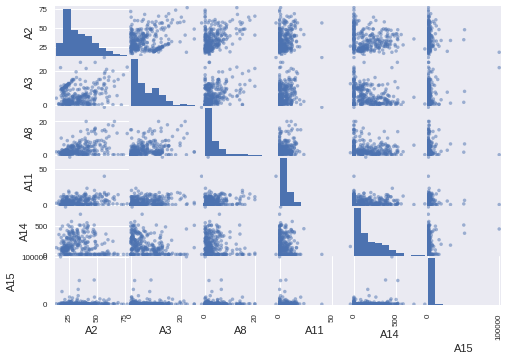

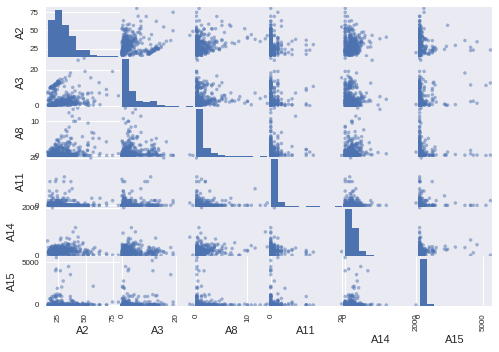

In [138]:
# Looking at positive and negative scatter matrix to see how variables variable relationships are different
pd.plotting.scatter_matrix(positive)
pd.plotting.scatter_matrix(negative);

# Observations:
# There do appear to be some visual differences between the two dataframes
# The distributions for the variables are different between positive and negative as well
# A15's distribution is heavily concentrated in both dataframes

#### Running t-tests

In [139]:
# Looking at the variances of the two variables I want to compare in the ttest
# so I know what to set the equal_var paramenter as -- the variances are different
positive['A2'].var(), negative['A2'].var()

(164.08689613891292, 119.23091675314936)

In [140]:
# Setting equal_var to False and nan_policy to omit to run the ttest

stats.ttest_ind(positive['A2'], negative['A2'], equal_var=False, nan_policy='omit')

# These samples appear to be very different because the p-value is very small

Ttest_indResult(statistic=4.224490929851236, pvalue=2.7673850124552034e-05)

In [141]:
# Looking at the variances of A14 and A11 -- also a substantial difference
positive['A14'].var(), negative['A14'].var()

(26169.751384274627, 32965.78943971628)

In [142]:
# Again, setting equal_var to False and nan_policy to omit to run the ttest
stats.ttest_ind(positive['A14'], negative['A14'], equal_var=False, nan_policy='omit')

# There is less of an extreme difference between these two samples,
# but we would still reject the null hypothesis

Ttest_indResult(statistic=-2.6696493137915973, pvalue=0.0077778250827957)

#### Running chi-squared tests

In [143]:
# Creating a crosstab with margins that add the total across rows and columns
# This is to setup the use of stats.chi2_contingency
ct_A1 = pd.crosstab(df['A16'],df['A1'], margins=True )
ct_A1

A1,a,b,All
A16,,,
+,98,206,304
-,112,262,374
All,210,468,678


In [144]:
# Using chi-squared contingency function to compare A1 negative and positive class
stats.chi2_contingency(ct_A1)

# The p-value is large, so we accept the null hypothesis

(0.41143508194591916,
 0.981530018361231,
 4,
 array([[ 94.15929204, 209.84070796, 304.        ],
        [115.84070796, 258.15929204, 374.        ],
        [210.        , 468.        , 678.        ]]))

In [145]:
# Making another crosstab to compare A4 between positive and negative class
ct_A4 = pd.crosstab(df['A16'].dropna(),df['A4'].dropna(), margins=True )
ct_A4

A4,l,u,y,All
A16,,,,
+,2,256,45,303
-,0,263,118,381
All,2,519,163,684


In [146]:
stats.chi2_contingency(ct_A4)

# The p-value is very small, so we reject the null hypothesis

(26.234074966202144,
 0.0002013603203375773,
 6,
 array([[  0.88596491, 229.90789474,  72.20614035, 303.        ],
        [  1.11403509, 289.09210526,  90.79385965, 381.        ],
        [  2.        , 519.        , 163.        , 684.        ]]))

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

#### Interpretation of the two t-tests:

To set up the two t-tests, I first separated the data into two dataframes, one for positive class and one for negative class. Then, I looked at the scatter matrixes of both data frames to try and spot differences in the distributions of the variables. The first t-test I ran compared the positive A2 variable with the negative A2 variable. It produced a very small p-value, which led me to reject the null hypothesis that both samples have identical average (expected) values (i.e. the null hypothesis for stats.ttest_ind). I did not find a variable between the positive and negative class dataframes that led me to accept the null hypothesis, so, for the second t-test, I went with A14 because it had the largest p-value. But the p-value was still small enough to reject the null hypothesis that the two samples have identical average values.


#### Interpretation of the two chi-squared tests:

To run the chi-squared tests to compare positive and negative classes, I first set up the data with the crosstab function. I set the margins parameter to True so it would become a contigency table. The first chi-squared test I ran for the categorical variable was A1 (between positive and negative classes). The stats.chi2_contingency function produced a large p-value, so I accepted the null hypothesis that the two samples are independent. The second chi-squared test I ran was with the A4 variable. For this test, the p-value was very small, thus I rejected the null hypothesis. The A4 positive class and the A4 negative class appear to be dependent samples.


#### The most challenging part of this sprint challenge:

Honestly, I had a bit of trouble with Part I. When pandas parses data from a csv, sometimes it assigns the wrong data type to the variables. It took me awhile to figure out that I could manually assign the data types. However, the most challenging thing about statistical testing in general is interpreting the results. It takes time to read the documentation to figure out what the functions are returning and what the parameters should be set to while using the functions. A better understanding of statistics would help. Statistics is such a deep field that I feel like I'm barely scratching the surfice with my current understanding, and I've taken many college courses on statistics.